In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install soundfile
!pip install librosa

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import soundfile# AUDIO KIND OF ANALYSIS
import os, glob# path of file
import pickle#format to save the file 
import numpy as np#for arrays
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!pip install librosa soundfile scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#EXTRACT FEATURES(mfcc, chroma, mel) FROM A SOUND FILE
def extract_feature(file_name, mfcc=True , chroma=True, mel=True):
    with soundfile.SoundFile(file_name) as sound_file:
        y = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(y))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=y, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [ ]:
# EMOTIONS IN THE RAVDESS DATASET
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [ ]:
#EMOTIONS TO OBSERVE
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']

In [ ]:
!unzip -u "/content/drive/My Drive/RAVDESS dataset.zip" -d "/content/drive/My Drive/data"

Archive:  /content/drive/My Drive/RAVDESS dataset.zip


In [ ]:
#LOAD THE DATA AND EXTRACT FEATURES FOR EACH SOUND FILE
def load_data(test_size=0.2):
    x, y = [], []
    for file in glob.glob("/content/drive/My Drive/data/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#SPLIT THE DATASET
x_train, x_test, y_train, y_test = load_data(test_size=0.23)

In [ ]:
x_train

array([[-6.31065125e+02,  6.65174179e+01,  1.57098160e+01, ...,
         6.43245803e-05,  4.71895037e-05,  1.98434445e-05],
       [-5.77694397e+02,  4.96554718e+01, -1.03174582e+01, ...,
         3.26680129e-05,  1.84478813e-05,  1.61383432e-05],
       [-5.55719055e+02,  4.36343994e+01,  7.08933067e+00, ...,
         3.12545430e-03,  3.76589503e-03,  3.33341025e-03],
       ...,
       [-3.94290833e+02,  2.68939362e+01, -5.82934046e+00, ...,
         2.97830580e-03,  1.44088711e-03,  9.12306888e-04],
       [-5.72123230e+02,  5.14269180e+01,  1.57936087e+01, ...,
         1.33018836e-03,  8.56102910e-04,  4.30961343e-04],
       [-4.95576782e+02,  1.16502113e+01, -2.18401623e+01, ...,
         2.36127945e-03,  1.51480746e-03,  1.02561142e-03]])

In [ ]:
x_test[1]

array([-6.99778625e+02,  5.78236160e+01,  2.25398521e+01,  2.26032448e+01,
        1.25593100e+01,  8.73827457e+00,  3.74764419e+00,  1.73301864e+00,
        1.11316729e+00,  8.89138603e+00,  1.15114498e+00, -2.05356386e-02,
        1.23896289e+00,  4.75672674e+00, -1.55017972e+00,  5.62732697e-01,
       -2.86988497e+00,  2.51082444e+00, -3.58028197e+00,  2.51498389e+00,
       -8.91201258e-01, -3.10025311e+00, -1.28338623e+00,  4.26584808e-03,
       -2.02523255e+00,  3.50954443e-01, -1.37911785e+00,  1.43109930e+00,
        4.03181285e-01,  1.58562094e-01, -1.38730526e+00, -4.62453246e-01,
       -1.59672797e+00,  2.86379069e-01, -1.43396485e+00, -1.07899857e+00,
       -2.49855161e+00, -1.64283228e+00, -2.11750555e+00, -2.09649897e+00,
        6.27912819e-01,  6.19556367e-01,  6.43573105e-01,  7.00509191e-01,
        6.99858010e-01,  7.62060225e-01,  7.81097114e-01,  7.65498579e-01,
        7.71277070e-01,  7.97208667e-01,  7.66938567e-01,  7.29276240e-01,
        7.85580050e-05,  

In [ ]:
#GET THE SHAPE OF TRAINING AND TESTING DATASETS
print((x_train.shape[0], x_test.shape[0]))

(591, 177)


In [ ]:
#GET THE NO.OF FEATURES EXTRACTED
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#CREATION OF WAVEPLOT
import soundfile
import matplotlib.pyplot as plt
import os

def createWaveplot(file_path):
    with soundfile.SoundFile(file_path) as sound_file:
        data = sound_file.read(dtype="float32")
        sr = sound_file.samplerate
        file_name = os.path.basename(file_path)
        emotion = emotions[file_name.split("-")[2]]
        plt.figure(figsize=(10,3))
        plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
        plt.plot(data)
        plt.show()


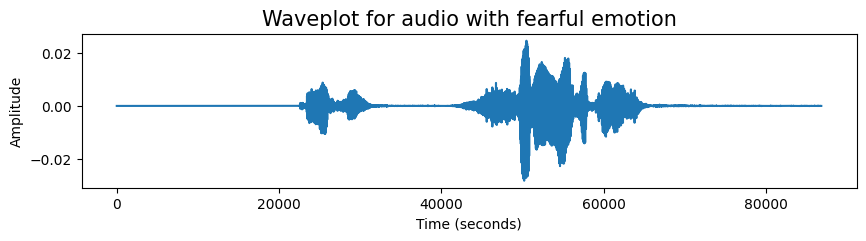

In [ ]:
import os
import glob
import librosa
import matplotlib.pyplot as plt
import random
# Set the path to the directory containing the audio files
data_dir = '/content/drive/My Drive/data/'

# Define a mapping of emotion labels to numbers
emotion_map = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}

# Get a list of all audio files in the directory and its subdirectories
audio_files = glob.glob(os.path.join(data_dir, 'Actor_*/*.wav'))

# Select a random audio file from the list
filename = random.choice(audio_files)

# Load the audio file using librosa
data, sr = librosa.load(filename)

# Get the emotion label from the filename
basename = os.path.basename(filename)
emotion_number = int(basename.split('-')[2])
e = emotion_map.get(emotion_number, 'unknown')

# Plot the waveplot
plt.figure(figsize=(10,2))
plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(data)
plt.show()

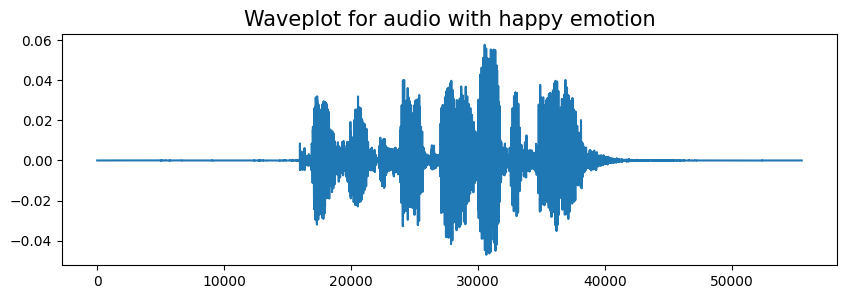

In [ ]:
file_path = "/content/drive/My Drive/data/Actor_01/03-01-03-01-01-01-01.wav"
createWaveplot(file_path)

In [ ]:
#CREATION OF SPECTROGRAM
def createSpectrogram(data, sr, e):
    plt.figure(figsize=(12, 3)) # corrected line
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()


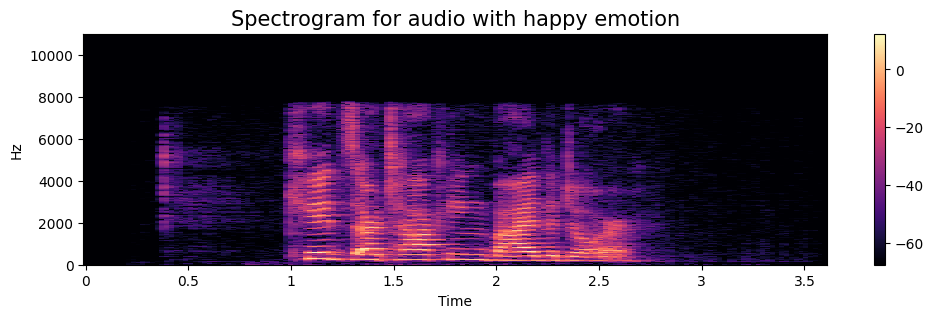

In [ ]:
# Plot the waveplot and spectrogram for a random audio sample from the test set
import random

# Select a random sample from the test set
idx = random.randint(0, len(x_test)-1)
sample = x_test[idx]
emotion = y_test[idx]

# Reshape the sample into a 2D array with a single row
sample = sample.reshape(1, -1)

# Scale the sample using MinMaxScaler
scaler = MinMaxScaler()
sample = scaler.fit_transform(sample)

# Plot the waveplot
data, sr = librosa.load(glob.glob("/content/drive/My Drive/data/Actor_*/*.wav")[idx])

# Plot the spectrogram
createSpectrogram(data, sr, emotion)


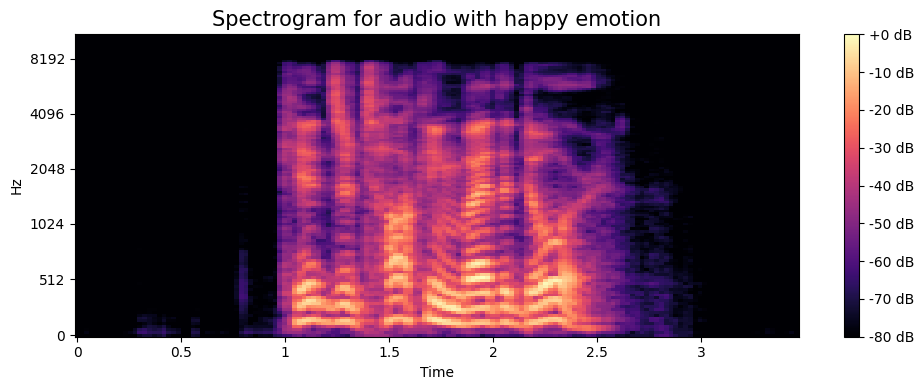

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define the path to the audio file
audio_path = "/content/drive/My Drive/data/Actor_01/03-01-03-01-01-01-01.wav"

# Define a dictionary to map numerical labels to emotion labels
RAVDESS_EMOTION_LABELS = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}

# Extract the emotion label from the filename
filename = os.path.basename(audio_path)
emotion_label = RAVDESS_EMOTION_LABELS[int(filename.split("-")[2])]

# Load the audio data
data, sr = librosa.load(audio_path)

# Plot the spectrogram with emotion label in the title
plt.figure(figsize=(10, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_fft=2048, hop_length=512)
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for audio with {} emotion'.format(emotion_label), size=15)
plt.tight_layout()
plt.show()


In [ ]:
def noise(data):
  noiseAmp = 0.035*np.random.uniform()*np.amax(data)
  data=data+noiseAmp.random.normal(size=data.shape[0])
  return data

def stretch(data, rate=0.8):
  return librosa.effects.time_stretch(data, rate)

def shift(data):
  shiftRange= int(np.random.uniform(low=-5, high =5)*1000)
  return np.roll(data, shiftRange)

def pitch(data, samplingRate, pitchfactor =0.7):
  return librosa.effects.pitch_shift(data, samplingRate, pitchFactor)

In [ ]:
file_path = "/content/drive/My Drive/data/Actor_01/03-01-03-01-01-01-01.wav"
data, sample_rate = librosa.load(file_path)

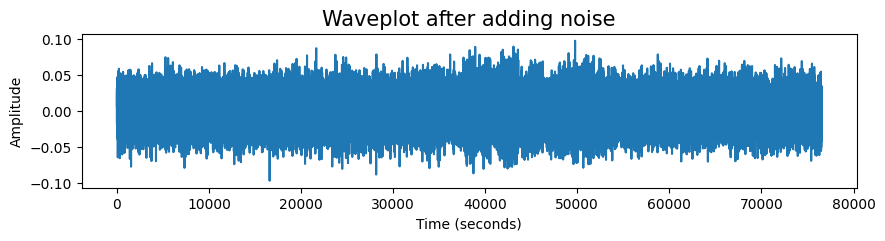

In [ ]:
# Apply noise augmentation
noise_factor = 0.02
noisy_data = data + noise_factor * np.random.randn(len(data))

# Plot the waveplot after adding noise
plt.figure(figsize=(10,2))
plt.title('Waveplot after adding noise', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(noisy_data)
plt.show()

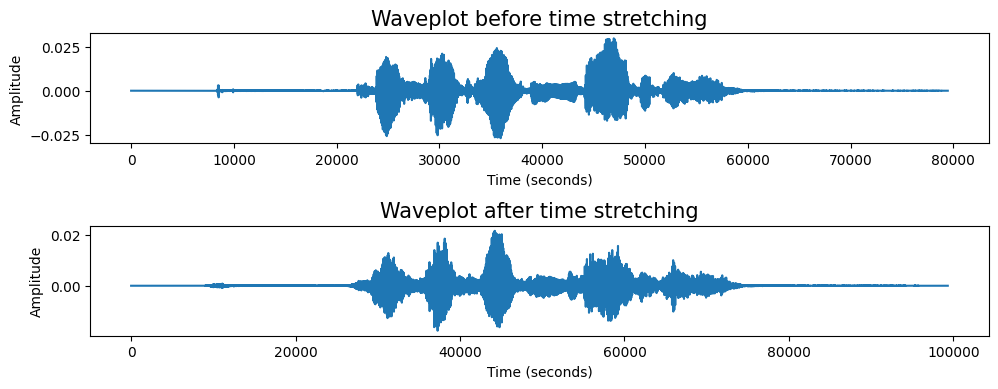

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import glob

def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=np.array(data).shape[0])
    return data

def stretch(data, rate=0.8):
  return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# Load audio file
file_path = glob.glob("/content/drive/My Drive/data/Actor_*/*.wav")[idx]
y, sr = librosa.load(file_path)

# Apply time stretching
stretch_factor = 0.8
y_stretched = stretch(y, rate=stretch_factor)

# Plot waveplot before and after stretching
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.title('Waveplot before time stretching', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(y)
plt.subplot(2,1,2)
plt.title('Waveplot after time stretching', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(y_stretched)
plt.tight_layout()
plt.show()


In [ ]:
!pip install --upgrade librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


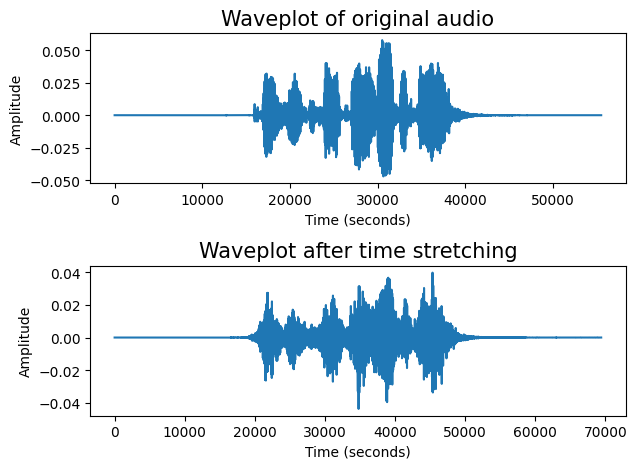

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load('/content/drive/My Drive/data/Actor_01/03-01-03-01-01-01-01.wav', sr=None)


# Apply time stretching
stretch_factor = 0.8
y_stretched = librosa.effects.time_stretch(y, rate=stretch_factor)



# Plot the original and stretched waveforms
plt.subplot(2, 1, 1)
plt.title('Waveplot of original audio', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(y)

plt.subplot(2, 1, 2)
plt.title('Waveplot after time stretching', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(y_stretched)

plt.tight_layout()
plt.show()

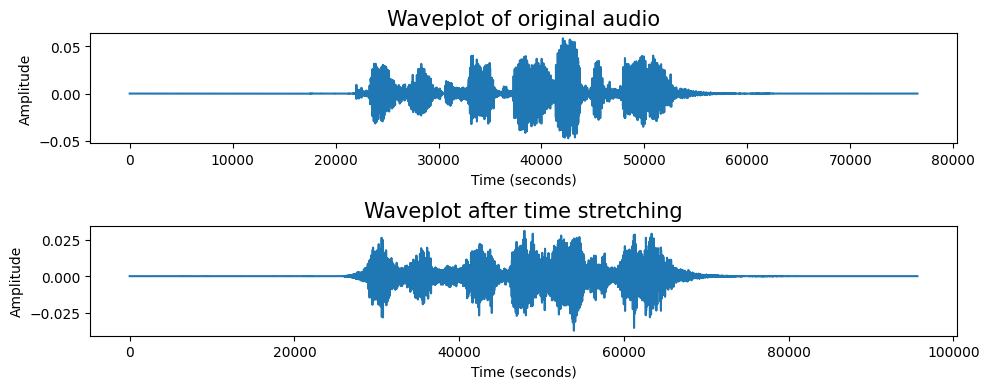

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load audio file
file_path = "/content/drive/My Drive/data/Actor_01/03-01-03-01-01-01-01.wav"
y, sr = librosa.load(file_path)

# Apply time stretching
stretch_factor = 0.8

y_stretched = librosa.effects.time_stretch(y, rate=stretch_factor)

# Plot waveplot before and after stretching
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.title('Waveplot of original audio', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(y)
plt.subplot(2,1,2)
plt.title('Waveplot after time stretching', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(y_stretched)
plt.tight_layout()
plt.show()

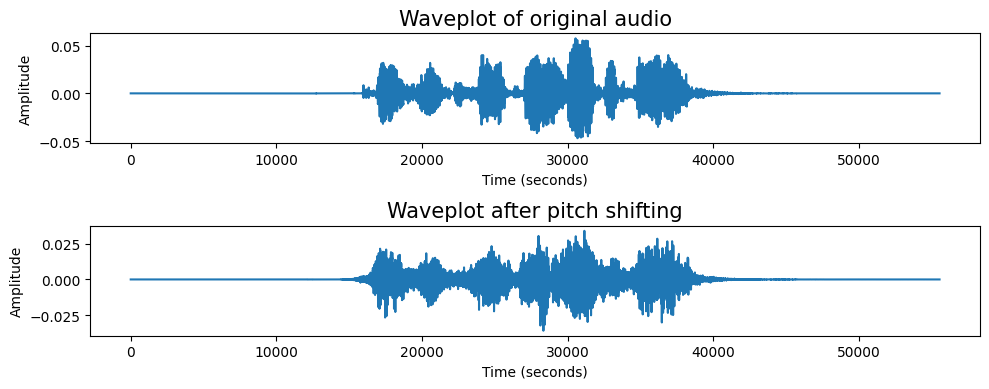

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load('/content/drive/My Drive/data/Actor_01/03-01-03-01-01-01-01.wav', sr=None)

# Apply pitch shifting
pitch_factor = 2
y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=pitch_factor)

# Plot the original and shifted waveforms
plt.figure(figsize=(10,4))
plt.subplot(2, 1, 1)
plt.title('Waveplot of original audio', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(y)

plt.subplot(2, 1, 2)
plt.title('Waveplot after pitch shifting', size=15)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(y_shifted)

plt.tight_layout()
plt.show()


In [ ]:
#INITIALIZE THE MLP
model=MLPClassifier(hidden_layer_sizes=(500,400), activation='tanh', solver='adam', alpha=0.001, 
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.0001, max_iter=2000, 
                    shuffle=True, random_state=42, tol=0.0001, verbose=True, early_stopping=False, 
                    validation_fraction=0.1,n_iter_no_change=10, max_fun=2000)

In [ ]:
#TRAIN THE MODEL
model.fit(x_train,y_train)

Iteration 1, loss = 1.80189859
Iteration 2, loss = 1.45883193
Iteration 3, loss = 1.53791462
Iteration 4, loss = 1.49989229
Iteration 5, loss = 1.38809343
Iteration 6, loss = 1.36057382
Iteration 7, loss = 1.37912585
Iteration 8, loss = 1.34983510
Iteration 9, loss = 1.31455856
Iteration 10, loss = 1.31326247
Iteration 11, loss = 1.30632028
Iteration 12, loss = 1.28420920
Iteration 13, loss = 1.26945684
Iteration 14, loss = 1.26100024
Iteration 15, loss = 1.24934202
Iteration 16, loss = 1.23596860
Iteration 17, loss = 1.22587405
Iteration 18, loss = 1.21374256
Iteration 19, loss = 1.20063240
Iteration 20, loss = 1.18911322
Iteration 21, loss = 1.18001938
Iteration 22, loss = 1.16917082
Iteration 23, loss = 1.16076533
Iteration 24, loss = 1.14984337
Iteration 25, loss = 1.14169037
Iteration 26, loss = 1.13233629
Iteration 27, loss = 1.12265573
Iteration 28, loss = 1.11400289
Iteration 29, loss = 1.10750101
Iteration 30, loss = 1.09945893
Iteration 31, loss = 1.09040947
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(500, 400),
              learning_rate_init=0.0001, max_fun=2000, max_iter=2000,
              random_state=42, verbose=True)

[1.8018985853645106, 1.45883192914596, 1.5379146230382028, 1.4998922904422947, 1.3880934332528012, 1.3605738197984605, 1.3791258499243824, 1.3498350999931024, 1.3145585580825845, 1.3132624695807038, 1.306320277116772, 1.2842091983251789, 1.269456838769102, 1.2610002404013345, 1.2493420169468594, 1.2359685967795024, 1.2258740539651105, 1.2137425641818327, 1.2006323958817957, 1.1891132193596499, 1.180019375487609, 1.1691708162732413, 1.160765325265136, 1.1498433739608842, 1.1416903717396283, 1.1323362949378422, 1.122655734413158, 1.1140028883252568, 1.1075010063891566, 1.099458926704616, 1.0904094689419925, 1.0812619345430214, 1.0732731246349567, 1.064390484494089, 1.061081844401528, 1.0501411928943465, 1.0510539056725148, 1.035406039748236, 1.0349385742234722, 1.023774998420032, 1.0213242366186799, 1.0113931449444944, 1.001942853415372, 0.9946221538843854, 0.9867925182417229, 0.9810994612170282, 0.9757300925378488, 0.9667681621860882, 0.9672342187529105, 0.9552577536894686, 0.9533384682

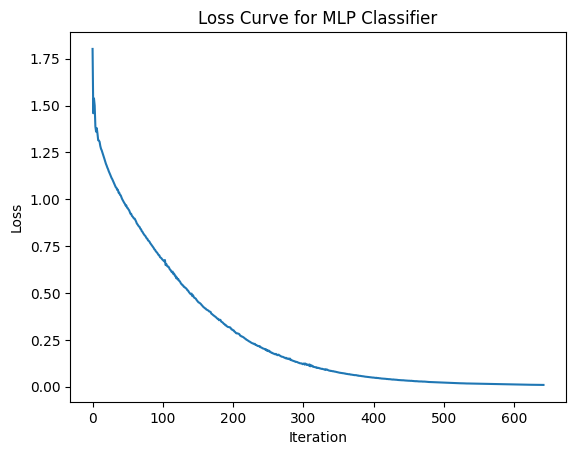

In [ ]:
import matplotlib.pyplot as plt

loss_values = model.loss_curve_
print(loss_values)

plt.plot(loss_values)
plt.title("Loss Curve for MLP Classifier")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


PLOTTING OF LOSS_VALUES

In [ ]:
#PREDICT THE TEST SET
y_pred=model.predict(x_test)
y_predProba=model.predict_proba(x_test)
result = list(y_predProba[1])

In [ ]:
result

[0.9998283564941254,
 1.9905144537967376e-05,
 5.148668581300071e-05,
 0.00010025167552385118]

In [ ]:
expected_Of_y = y_test
y_pred=model.predict(x_test)
y_pred

array(['disgust', 'calm', 'calm', 'disgust', 'calm', 'disgust', 'happy',
       'happy', 'disgust', 'happy', 'calm', 'calm', 'calm', 'happy',
       'disgust', 'disgust', 'calm', 'happy', 'calm', 'happy', 'disgust',
       'fearful', 'calm', 'disgust', 'fearful', 'happy', 'calm', 'happy',
       'calm', 'disgust', 'fearful', 'disgust', 'disgust', 'disgust',
       'fearful', 'fearful', 'calm', 'calm', 'fearful', 'fearful',
       'disgust', 'fearful', 'fearful', 'calm', 'fearful', 'fearful',
       'happy', 'fearful', 'disgust', 'calm', 'disgust', 'disgust',
       'fearful', 'happy', 'disgust', 'disgust', 'happy', 'calm',
       'fearful', 'calm', 'calm', 'calm', 'fearful', 'disgust', 'calm',
       'fearful', 'disgust', 'disgust', 'happy', 'disgust', 'disgust',
       'calm', 'disgust', 'calm', 'happy', 'disgust', 'happy', 'happy',
       'calm', 'calm', 'disgust', 'disgust', 'fearful', 'happy', 'happy',
       'disgust', 'fearful', 'happy', 'calm', 'calm', 'fearful', 'calm',
       

In [ ]:
print(metrics.confusion_matrix(expected_Of_y, y_pred))

[[39  1  2  0]
 [ 5 41  1  2]
 [ 3  1 38  4]
 [ 1  4  4 31]]


ValueError: ignored

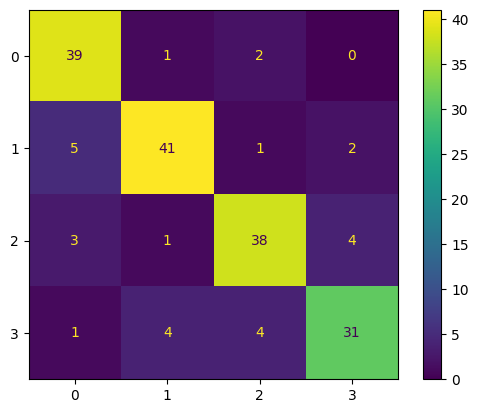

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(expected_Of_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

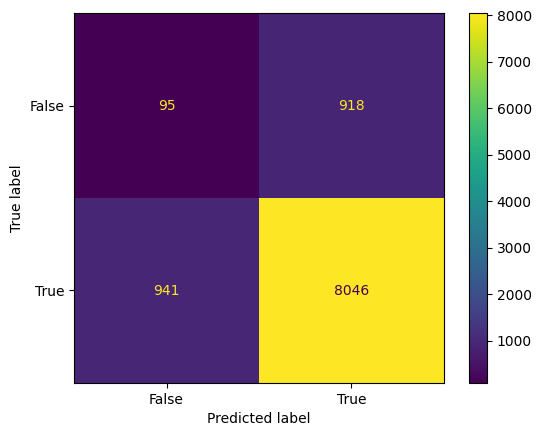

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size =10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
#CONFUSION MATRIX FOR MLP CLASSIFIER

CONFUSION MATRIX FOR MLP CLASSIFIER

In [ ]:
i = 0
for emotion in observed_emotions:
  print(emotion, result[i]*100)
  i=i+1

calm 99.98283564941254
happy 0.0019905144537967377
fearful 0.005148668581300071
disgust 0.010025167552385118


In [ ]:
#CALCULATE THE ACCURACY OF OUR MODEL
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 84.18%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.86666667, 0.85416667, 0.83516484, 0.80519481])

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd


report_dict = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_dict)

,calm,disgust,fearful,happy,accuracy,macro avg,weighted avg
precision,0.812500,0.872340,0.844444,0.837838,0.841808,0.841781,0.843094
recall,0.928571,0.836735,0.826087,0.775000,0.841808,0.841598,0.841808
f1-score,0.866667,0.854167,0.835165,0.805195,0.841808,0.840298,0.841127
support,42.000000,49.000000,46.000000,40.000000,0.841808,177.000000,177.000000


CLASSIFICATION REPORT

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,disgust,disgust
1,calm,calm
2,calm,calm
3,disgust,disgust
4,disgust,calm
5,disgust,disgust
6,happy,happy
7,happy,happy
8,disgust,disgust
9,happy,happy


In [ ]:
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 43.1 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr

# Initialize the recognizer
r = sr.Recognizer()

# Load the audio file
with sr.AudioFile('/content/drive/My Drive/data/Actor_02/03-01-01-01-01-01-02.wav') as source:
    audio_data = r.record(source)

# Recognize speech using Google Speech Recognition
try:
    text = r.recognize_google(audio_data)
    print("Recognized speech:", text)
except sr.UnknownValueError:
    print("Speech recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))

Recognized speech: kids are talking by the door


DETECTS AND CONVERTS THE AUDIO FILE SPEECH TO TEXT

In [ ]:
test = model.predict([extract_feature('/content/drive/My Drive/data/Actor_02/03-01-01-01-01-01-02.wav')])
test

array(['disgust'], dtype='<U7')

In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("/content/drive/My Drive/data/Actor_01/03-01-01-01-01-01-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['calm'], dtype='<U7')

In [ ]:
feature

array([[-6.93497009e+02,  5.00643921e+01,  5.71450531e-01,
         1.43299656e+01,  3.33637071e+00, -2.54071975e+00,
        -4.05790949e+00, -1.07119999e+01, -7.29413939e+00,
         1.74018872e+00, -4.19064236e+00,  1.95466173e+00,
        -5.24789381e+00,  2.78142977e+00, -3.16756773e+00,
        -3.40008307e+00, -2.37803197e+00, -5.68717539e-01,
        -6.47753334e+00, -1.24320555e+00, -2.80542517e+00,
        -5.43635798e+00, -4.46875393e-01, -3.63516593e+00,
        -2.98372602e+00, -5.63902557e-01, -1.65101993e+00,
        -5.55944741e-01, -3.41018438e+00, -2.24465466e+00,
        -3.13058877e+00, -2.70089960e+00, -1.88821292e+00,
        -5.54154456e-01, -3.96459913e+00, -2.13485193e+00,
        -3.94577074e+00, -1.62457860e+00, -2.03990698e+00,
        -3.62910867e+00,  6.33734703e-01,  6.48760676e-01,
         6.21744275e-01,  6.34553194e-01,  6.60345614e-01,
         6.60463989e-01,  7.00949013e-01,  7.31556356e-01,
         7.46921539e-01,  7.23420441e-01,  7.16119647e-0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 68.93%


In [ ]:
y_true= y_test
print(metrics.confusion_matrix(y_true, y_pred))

[[40  1  0  1]
 [10 36  2  1]
 [ 6  9 20 11]
 [ 1  7  6 26]]


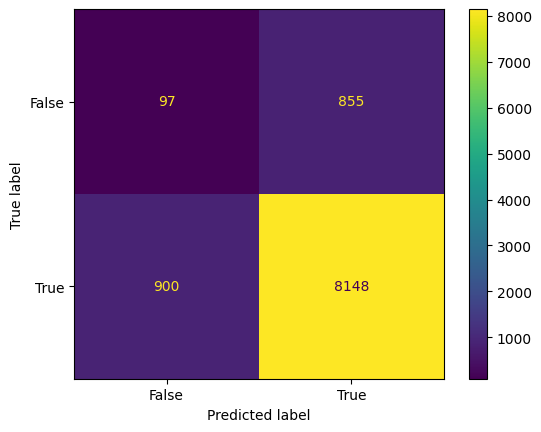

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size =10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

# Train the model on the training data
clf.fit(x_train, y_train)
# Predict the emotions of the test data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 84.18%


In [ ]:
y_true= y_test
print(metrics.confusion_matrix(y_test, y_pred))

[[39  1  2  0]
 [ 5 41  1  2]
 [ 3  1 38  4]
 [ 1  4  4 31]]


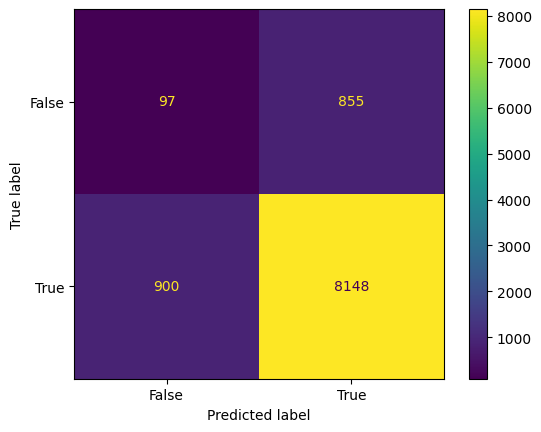

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

CONFUSION MATRIX FOR DECISION TREE


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
model = SVC(kernel='rbf', C=100, gamma=0.001)

# Train the model on the training data
model.fit(x_train, y_train)

# Predict the emotions of the test data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 74.01%


In [ ]:
y_label= y_test
print(metrics.confusion_matrix(y_true, y_pred))

[[38  1  3  0]
 [ 7 36  5  1]
 [ 3  5 30  8]
 [ 1  7  5 27]]


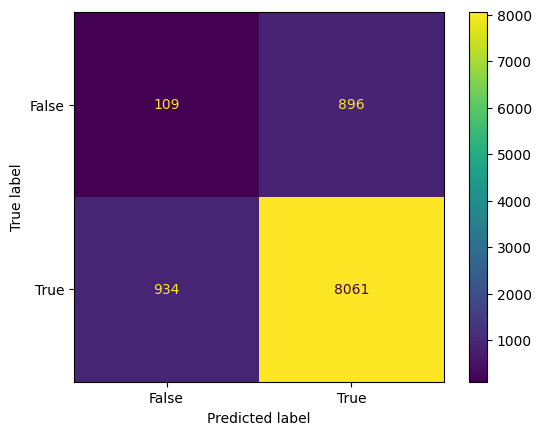

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size =10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

CONFUSION MATRIX FOR SVM


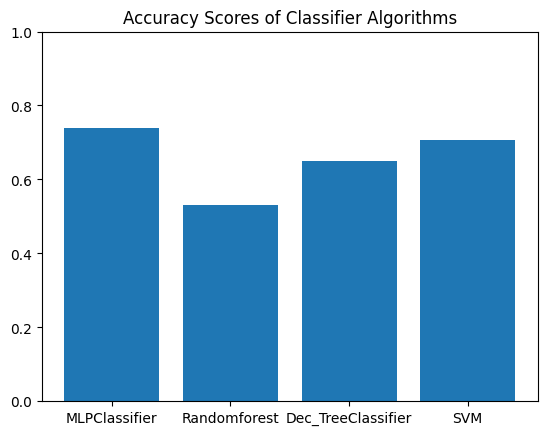

In [ ]:
#!apt install DecisonTreeClassifier
#!pip install sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the list of classifier algorithms to compare

classifiers = [SVC(kernel='rbf', C=100, gamma=0.001),DecisionTreeClassifier(max_depth =3, random_state = 42),RandomForestClassifier(), MLPClassifier(n_iter_no_change=10,max_iter=636)]

# Train and test the model using each classifier algorithm
accuracies = []
for classifier in classifiers:
    model = classifier.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracies.append(accuracy)

# Plot the accuracy scores of all the models
plt.bar(['MLPClassifier','Randomforest','Dec_TreeClassifier','SVM'], accuracies)
plt.ylim([0, 1])
plt.title('Accuracy Scores of Classifier Algorithms')
plt.show()

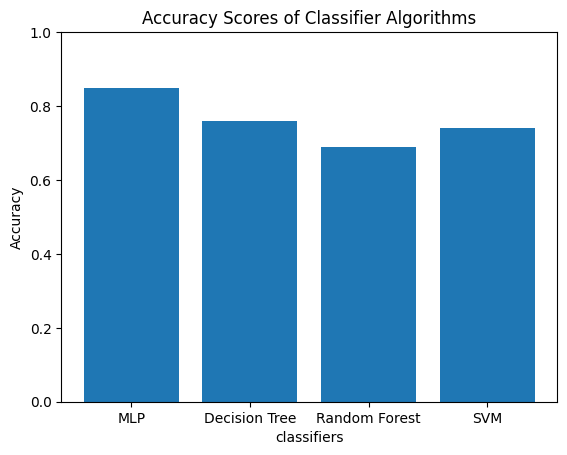

In [ ]:
import matplotlib.pyplot as plt

# accuracies for each model
mlp_acc = 0.85


dt_acc = 0.76
svm_acc = 0.74
rf_acc = 0.69

# create a bar plot
plt.bar(['MLP', 'Decision Tree', 'Random Forest', 'SVM'], [mlp_acc, dt_acc, rf_acc,svm_acc])

# set the y-axis limits
plt.ylim([0, 1])

# set the title and axis labels
plt.title('Accuracy Scores of Classifier Algorithms')
plt.xlabel('classifiers')
plt.ylabel('Accuracy')

# show the plot
plt.show()


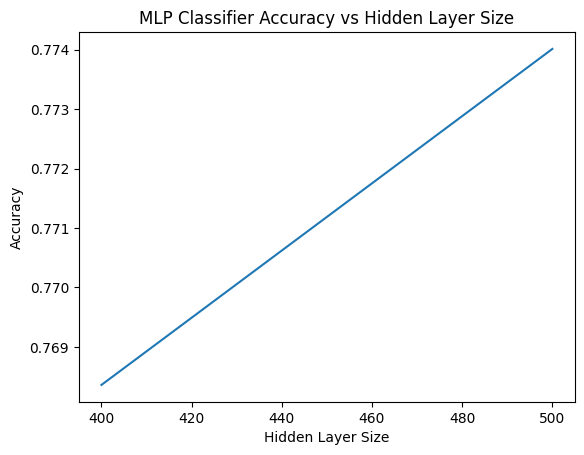

In [ ]:
import matplotlib.pyplot as plt

hidden_layers = [500,400]
accuracy = []

for layers in hidden_layers:
    model = MLPClassifier(alpha=0.01, batch_size='auto', epsilon=1e-08, 
                          hidden_layer_sizes=layers, learning_rate='adaptive', 
                          max_iter=500)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_true=y_test, y_pred=y_pred))

plt.plot(hidden_layers, accuracy)
plt.title("MLP Classifier Accuracy vs Hidden Layer Size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.show()